In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
sdge_final_data = pd.read_csv('merged_sdge_data.csv')
sdge_final_data

,Date,SDGE,Year,Month,Day,Week_day,Season,Holiday,Non_working,DailyCoolingDegreeDays,DailyHeatingDegreeDays,HourlyDryBulbTemperature
0,2019-01-01,48485.355385,2019,1,1,Tuesday,winter,1,non-working,0.0,12.0,52.344828
1,2019-01-02,56532.901573,2019,1,2,Wednesday,winter,0,working,0.0,13.0,52.068966
2,2019-01-03,57024.675624,2019,1,3,Thursday,winter,0,working,0.0,12.0,53.333333
3,2019-01-04,56456.888148,2019,1,4,Friday,winter,0,working,0.0,12.0,53.551724
4,2019-01-05,55838.513720,2019,1,5,Saturday,winter,0,non-working,0.0,9.0,55.793103
...,...,...,...,...,...,...,...,...,...,...,...,...
1211,2022-04-26,46399.542960,2022,4,26,Tuesday,winter,0,working,0.0,2.0,62.656250
1212,2022-04-27,44594.505611,2022,4,27,Wednesday,winter,0,working,0.0,4.0,60.272727
1213,2022-04-28,46513.391923,2022,4,28,Thursday,winter,0,working,0.0,4.0,60.088235
1214,2022-04-29,43917.675495,2022,4,29,Friday,winter,0,working,0.0,4.0,60.896552


<AxesSubplot:xlabel='Date'>

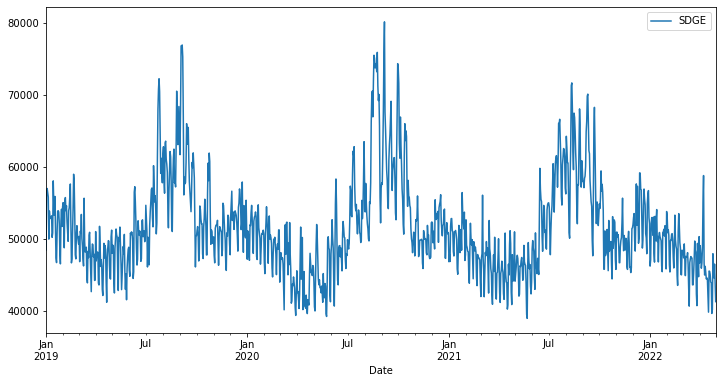

In [10]:
sdge_final_data["Date"] = pd.to_datetime(sdge_final_data["Date"])
df=sdge_final_data[["Date","SDGE"]]
df.set_index('Date', inplace=True)
df.plot(figsize=(12,6))

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

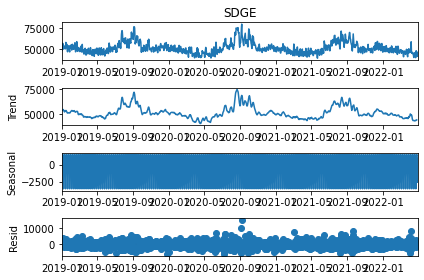

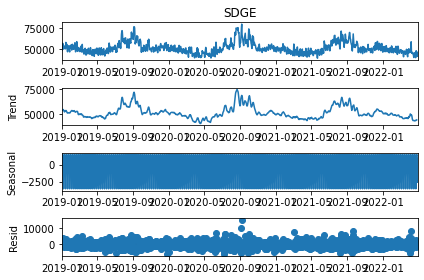

In [11]:
results = seasonal_decompose(df['SDGE'])
results.plot()

In [12]:
len(df)

1216

In [13]:
train = df.iloc[:1000]
test = df.iloc[1000:]

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [15]:
df.head(),df.tail()

(                    SDGE
 Date                    
 2019-01-01  48485.355385
 2019-01-02  56532.901573
 2019-01-03  57024.675624
 2019-01-04  56456.888148
 2019-01-05  55838.513720,
                     SDGE
 Date                    
 2022-04-26  46399.542960
 2022-04-27  44594.505611
 2022-04-28  46513.391923
 2022-04-29  43917.675495
 2022-04-30  41303.160069)

In [16]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [17]:
scaled_train[:10]

array([[0.23073194],
       [0.42601185],
       [0.43794513],
       [0.42416733],
       [0.40916199],
       [0.2674151 ],
       [0.36220859],
       [0.34134972],
       [0.34019228],
       [0.33631085]])

In [18]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [19]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [20]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.23073194 0.42601185 0.43794513]
Predict this y: 
 [[0.42416733]]


In [21]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [26]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [28]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
988/988 [==============================] - 3s 2ms/step - loss: 0.0140
Epoch 2/50
988/988 [==============================] - 2s 2ms/step - loss: 0.0106
Epoch 3/50
988/988 [==============================] - 2s 2ms/step - loss: 0.0088
Epoch 4/50
988/988 [==============================] - 2s 2ms/step - loss: 0.0073
Epoch 5/50
988/988 [==============================] - 2s 2ms/step - loss: 0.0063
Epoch 6/50
988/988 [==============================] - 2s 2ms/step - loss: 0.0060
Epoch 7/50
988/988 [==============================] - 2s 2ms/step - loss: 0.0057
Epoch 8/50
988/988 [==============================] - 2s 2ms/step - loss: 0.0056
Epoch 9/50
988/988 [==============================] - 2s 2ms/step - loss: 0.0055
Epoch 10/50
988/988 [==============================] - 2s 2ms/step - loss: 0.0056
Epoch 11/50
988/988 [==============================] - 2s 2ms/step - loss: 0.0054A: 0s - loss: 
Epoch 12/50
988/988 [==============================] - 2s 2ms/step - loss: 0.0054
Epoch 13/50

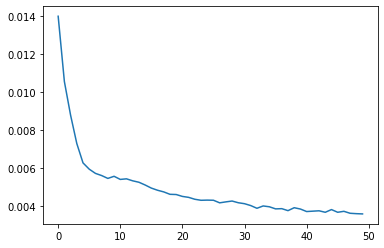

In [29]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [30]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)

array([[0.438005]], dtype=float32)

In [31]:
scaled_test[0]

array([0.39253281])

In [32]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [33]:
test_predictions

[array([0.438005], dtype=float32),
 array([0.44204587], dtype=float32),
 array([0.4799814], dtype=float32),
 array([0.502002], dtype=float32),
 array([0.4555418], dtype=float32),
 array([0.36737803], dtype=float32),
 array([0.41234836], dtype=float32),
 array([0.5489907], dtype=float32),
 array([0.60951865], dtype=float32),
 array([0.68269724], dtype=float32),
 array([0.7202408], dtype=float32),
 array([0.6975412], dtype=float32),
 array([0.6201058], dtype=float32),
 array([0.6257467], dtype=float32),
 array([0.6859562], dtype=float32),
 array([0.6782506], dtype=float32),
 array([0.7266636], dtype=float32),
 array([0.78740174], dtype=float32),
 array([0.7926505], dtype=float32),
 array([0.69160026], dtype=float32),
 array([0.58837795], dtype=float32),
 array([0.58040524], dtype=float32),
 array([0.5434022], dtype=float32),
 array([0.5170254], dtype=float32),
 array([0.5826624], dtype=float32),
 array([0.6366066], dtype=float32),
 array([0.6236108], dtype=float32),
 array([0.56057787], 

In [34]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

<ipython-input-34-df68ac2ffec1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:xlabel='Date'>

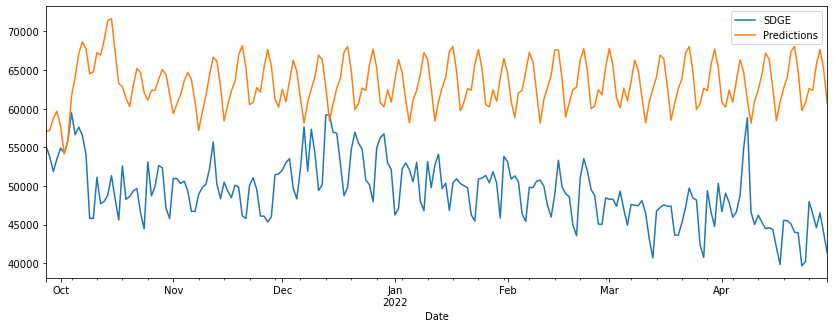

In [35]:
test.plot(figsize=(14,5))